In [9]:
import tensorflow as tf 
import keras 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
from keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(path = "imdb.npz",
num_words=10000,
skip_top=0,
maxlen=None,
seed=113,
start_char=1,
oov_char=2,
index_from=3)

In [3]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
def multi_hot_encoding(sentences,dim = 10000):
    results = np.zeros((len(sentences),dim))
    for i,wordindex in enumerate(sentences):
        results[i,wordindex] = 1.0
    return results
train_x_hot = multi_hot_encoding(x_train)


In [6]:
test_x_hot = multi_hot_encoding(x_test)

In [7]:
train_x_hot[0]

array([0., 1., 1., ..., 0., 0., 0.])

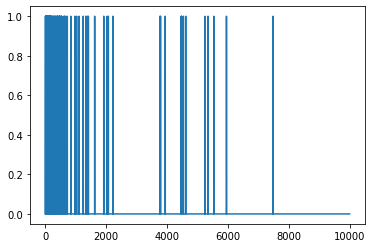

In [10]:
plt.plot(train_x_hot[0])
plt.show()

In [19]:
def build_and_train(hidden_dim, regularizer=None, dropout=0):
    model = keras.Sequential([
        keras.layers.Dense(hidden_dim, activation='relu', 
                           input_shape=(10000,),
                       
    kernel_regularizer=regularizer),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(hidden_dim, activation='relu',
                           kernel_regularizer=regularizer),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
    history = model.fit(train_x_hot, y_train, epochs=10, batch_size=512,validation_data=(test_x_hot, y_test), verbose=0)

    return history

In [20]:
y1 = build_and_train(16)
y2 = build_and_train(4)
y3 = build_and_train(512)